# Activating the Desired Environment

In [1]:
conda activate datascience


Note: you may need to restart the kernel to use updated packages.


# Import the file and basic library


In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
machine_data = pd.read_excel(r'D:\Disk_Drive\DocumentsBuckUp\360DigiDataScience\CapstoneIV\Finaldata.xlsx', 'Sheet1', usecols='A:S',engine='openpyxl')

# Check the Machine Data Shape and Missing Values

In [3]:
machine_data.shape

machine_data_median = pd.DataFrame(machine_data.median())
machine_data_median = machine_data_median.rename({0:"Median"}, axis=1)

machine_data_mean = pd.DataFrame(machine_data.mean())
machine_data_mean = machine_data_mean.rename({0:"Mean"}, axis=1)

machine_data_dist = pd.concat([machine_data_mean, machine_data_median],axis=1)
machine_data_dist['Subtract'] = machine_data_dist['Mean'] - machine_data_dist['Median']

# Delete unused variables
del(machine_data_mean)
del(machine_data_median)

C:\Users\ASHNER_NOVILLA\anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ASHNER_NOVILLA\anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


In [4]:
print(machine_data_dist)
# As we can observed that the mean and median does not differ widely from one another
# We can say that there is no outlier on our dataset

                Mean      Median  Subtract
M1HP1       2.208726    2.208888 -0.000162
M2HP1       2.208299    2.207932  0.000367
M3HP1       2.208147    2.207277  0.000870
M4HP1       2.208639    2.208818 -0.000179
M5HP1       2.208664    2.208775 -0.000111
M6HP1       2.207570    2.207514  0.000056
M7HP1       2.208096    2.207518  0.000578
M8HP7      15.594080   15.592334  0.001746
M9HP48    107.071423  107.099452 -0.028029
M10HP3      6.680506    6.679588  0.000918
M11HP3      6.680754    6.679239  0.001515
M12HP7     15.591082   15.588378  0.002704
M13HP19    42.359144   42.364037 -0.004893
FWB        17.930070   17.926620  0.003449
OC         59.792176   59.788066  0.004110
BBCM        2.986639    2.986804 -0.000165
allsum    290.144014  290.147658 -0.003644
Allplant  290.510185  290.498000  0.012185


In [5]:
machine_data.isna().sum()
# It can be observed that there is no missing data on the dataset

Timestamp    0
M1HP1        0
M2HP1        0
M3HP1        0
M4HP1        0
M5HP1        0
M6HP1        0
M7HP1        0
M8HP7        0
M9HP48       0
M10HP3       0
M11HP3       0
M12HP7       0
M13HP19      0
FWB          0
OC           0
BBCM         0
allsum       0
Allplant     0
dtype: int64

In [6]:
# Checking the Central Tendency and Data Dispersion
machine_data.describe()
# It can also observed that the min and max is not far away from the mean and 
# therefore the data is not widely disperse

,M1HP1,M2HP1,M3HP1,M4HP1,M5HP1,M6HP1,M7HP1,M8HP7,M9HP48,M10HP3,M11HP3,M12HP7,M13HP19,FWB,OC,BBCM,allsum,Allplant
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,2.208726,2.208299,2.208147,2.208639,2.208664,2.207570,2.208096,15.594080,107.071423,6.680506,6.680754,15.591082,42.359144,17.930070,59.792176,2.986639,290.144014,290.510185
std,0.040056,0.040039,0.039893,0.040017,0.040060,0.040018,0.040206,0.296007,1.986624,0.119944,0.120559,0.296429,0.780258,0.329756,1.110722,0.055695,2.478349,8.335886
min,2.138893,2.138907,2.138891,2.138898,2.138899,2.138900,2.138900,15.083334,103.611113,6.472229,6.472270,15.083362,41.000263,17.361140,57.861327,2.888889,282.901841,276.000000
25%,2.174031,2.174043,2.173672,2.174156,2.173721,2.173061,2.173070,15.338049,105.341544,6.576989,6.575960,15.337038,41.680041,17.645081,58.836799,2.938995,288.335711,283.314750
50%,2.208888,2.207932,2.207277,2.208818,2.208775,2.207514,2.207518,15.592334,107.099452,6.679588,6.679239,15.588378,42.364037,17.926620,59.788066,2.986804,290.147658,290.498000
75%,2.243613,2.243221,2.242614,2.243193,2.243189,2.241295,2.242942,15.850040,108.796389,6.784864,6.786241,15.843565,43.030151,18.215886,60.751309,3.034004,291.960595,297.676500
max,2.277766,2.277771,2.277774,2.277776,2.277776,2.277777,2.277730,16.111109,110.499856,6.888863,6.888870,16.110874,43.722219,18.499997,61.721935,3.083322,297.436367,304.997000


# Check the if the data is normal distribution using shapiro test

In [7]:
df_stat_shapiro = []
column = []
status=[]

for col in machine_data.iloc[:,1:].columns:
    # print(col)
    stat_shapiro = stats.shapiro(machine_data[col])
    # print(stat_shapiro)
    df_stat_shapiro.append(stat_shapiro[1])
    column.append(col)
    
    if stat_shapiro[1] > 0.05:
        x = 0
    else:
        x = 1    
    status.append(x)

del(stat_shapiro)
del(col)
del(x)

df_stat_shapiro = pd.DataFrame(df_stat_shapiro, columns=["Shapiro_Test"])
column = pd.DataFrame(column)
df_stat_shapiro['columns'] = column
df_stat_shapiro["Status"] = status
df_stat_shapiro["Status"] = df_stat_shapiro.Status.replace(1,"Probably Not Gaussian")
df_stat_shapiro["Status"] = df_stat_shapiro.Status.replace(0,"Probably Gaussian")

del(column)
del(status)

C:\Users\ASHNER_NOVILLA\AppData\Roaming\Python\Python37\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [8]:
print(df_stat_shapiro)
# As we can observed that the Shapiro Test Value < P-Value of 0.05 and 0.01 so we can say that 
# time series data is not following  gaussian distribution.
# Therefore the researcher need to use a predictive tool that does not based its forecast on 
# Gaussian distribution only

    Shapiro_Test   columns                 Status
0   0.000000e+00     M1HP1  Probably Not Gaussian
1   0.000000e+00     M2HP1  Probably Not Gaussian
2   0.000000e+00     M3HP1  Probably Not Gaussian
3   0.000000e+00     M4HP1  Probably Not Gaussian
4   0.000000e+00     M5HP1  Probably Not Gaussian
5   0.000000e+00     M6HP1  Probably Not Gaussian
6   0.000000e+00     M7HP1  Probably Not Gaussian
7   0.000000e+00     M8HP7  Probably Not Gaussian
8   0.000000e+00    M9HP48  Probably Not Gaussian
9   0.000000e+00    M10HP3  Probably Not Gaussian
10  0.000000e+00    M11HP3  Probably Not Gaussian
11  0.000000e+00    M12HP7  Probably Not Gaussian
12  0.000000e+00   M13HP19  Probably Not Gaussian
13  0.000000e+00       FWB  Probably Not Gaussian
14  0.000000e+00        OC  Probably Not Gaussian
15  0.000000e+00      BBCM  Probably Not Gaussian
16  5.771626e-24    allsum  Probably Not Gaussian
17  0.000000e+00  Allplant  Probably Not Gaussian


# Check the if the data is stationary or not using Adfuller Test

In [9]:
from statsmodels.tsa.stattools import adfuller
# We test the dataset using ADFuller Test to see if it has a trend and seasonality
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    if dftest[0] < dftest[4]["10%"]:
        print ("Reject Ho - Time Series is Stationary")
        x = 0
    else:
        print ("Failed to Reject Ho - Time Series is Non-Stationary")
        x = 1
    
    return x

df_stat_adfuller = []
column = []

for col in machine_data.iloc[:,1:].columns:
    # print(col)
    stat_adfuller = adf_test(machine_data[col])
    # print(stat_adfuller)
    df_stat_adfuller.append(stat_adfuller)
    column.append(col)

print(df_stat_adfuller)
print(column)

df_adf_test = pd.DataFrame(column, columns=['Attributes'])
df_adf_test ['Hypothesis'] = pd.DataFrame(df_stat_adfuller)

del(df_stat_adfuller)
del(column)
del(col)
del(stat_adfuller)

Results of Dickey-Fuller Test:
Test Statistic                  -133.261094
p-value                            0.000000
#Lags Used                         0.000000
Number of Observations Used    17999.000000
Critical Value (1%)               -3.430713
Critical Value (5%)               -2.861701
Critical Value (10%)              -2.566855
dtype: float64
Reject Ho - Time Series is Stationary
Results of Dickey-Fuller Test:
Test Statistic                  -134.164800
p-value                            0.000000
#Lags Used                         0.000000
Number of Observations Used    17999.000000
Critical Value (1%)               -3.430713
Critical Value (5%)               -2.861701
Critical Value (10%)              -2.566855
dtype: float64
Reject Ho - Time Series is Stationary
Results of Dickey-Fuller Test:
Test Statistic                  -134.309346
p-value                            0.000000
#Lags Used                         0.000000
Number of Observations Used    17999.000000
Critical 

In [10]:
# As we can see that the dataset based on the time series is that it is stationary.
# No need to convert our dataset to stationary

# Performing correlation analysis

<AxesSubplot:>

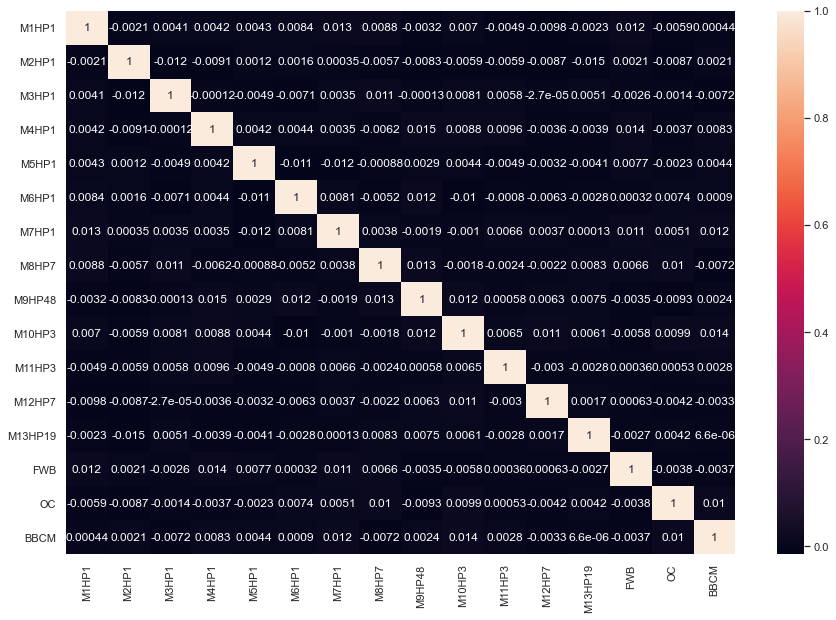

In [11]:
machine_data_corr = machine_data.iloc[:,1:17]
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(machine_data_corr.corr(), annot = True)
#As observed on the heatmap analysis that there is no great correlation between attributes

# Following the Correlation Analysis 
# Exactly –1. A perfect downhill (negative) linear relationship
# –0.70. A strong downhill (negative) linear relationship
# –0.50. A moderate downhill (negative) relationship
# –0.30. A weak downhill (negative) linear relationship
# 0. No linear relationship
# +0.30. A weak uphill (positive) linear relationship
# +0.50. A moderate uphill (positive) relationship
# +0.70. A strong uphill (positive) linear relationship
# Exactly +1. A perfect uphill (positive) linear relationship

# We can determine the strength of the correlation 

# Pearson Test

In [12]:
# Independent Test of Attributes with respect to All Sum
df_pearsonr = []
column = []
status = []

tmp_machine_data =  machine_data.iloc[:,1:]
tmp_machine_data = tmp_machine_data.loc[:,tmp_machine_data.columns!='allsum']

from scipy.stats import pearsonr
for col in tmp_machine_data.columns:
    stat, p = pearsonr(machine_data[col], machine_data['allsum'])
    if p > 0.05:
        print('Probably independent')
        x = 0
    else:
        print('Probably dependent')
        x = 1
    column.append(col)
    status.append(x)

        
df_pearsonr = pd.DataFrame(column, columns = ['Attributes'])
df_pearsonr['Status'] = pd.DataFrame(status)
df_pearsonr['Status'] = pd.DataFrame(np.where(df_pearsonr['Status']==0, "Probably independent", "Probably dependent"))

del(tmp_machine_data)
del(column)
del(status)
del(col)
del(x)

Probably independent
Probably independent
Probably dependent
Probably dependent
Probably dependent
Probably dependent
Probably dependent
Probably dependent
Probably dependent
Probably dependent
Probably dependent
Probably dependent
Probably dependent
Probably dependent
Probably dependent
Probably dependent
Probably independent


In [13]:
print(df_pearsonr)

   Attributes                Status
0       M1HP1  Probably independent
1       M2HP1  Probably independent
2       M3HP1    Probably dependent
3       M4HP1    Probably dependent
4       M5HP1    Probably dependent
5       M6HP1    Probably dependent
6       M7HP1    Probably dependent
7       M8HP7    Probably dependent
8      M9HP48    Probably dependent
9      M10HP3    Probably dependent
10     M11HP3    Probably dependent
11     M12HP7    Probably dependent
12    M13HP19    Probably dependent
13        FWB    Probably dependent
14         OC    Probably dependent
15       BBCM    Probably dependent
16   Allplant  Probably independent


In [14]:
# As we can observe that there is high dependecy of Machine Monitoring Attributes with All Sum
# Its been recommended that its better to manually forecast each attributr then do the summation

In [15]:
# Independent Test with respect to All Plant
tmp_machine_data =  machine_data.iloc[:,1:]
tmp_machine_data = tmp_machine_data.loc[:,tmp_machine_data.columns!='Allplant']
column = []
status = []

from scipy.stats import pearsonr
for col in tmp_machine_data.columns:
    stat, p = pearsonr(machine_data[col], machine_data['Allplant'])
    if p > 0.05:
        print('Probably independent')
        x = 0
    else:
        print('Probably dependent')
        x = 1
    column.append(col)
    status.append(x)

        
df_pearsonr_AllPlant = pd.DataFrame(column, columns = ['Attributes'])
df_pearsonr_AllPlant['Status'] = pd.DataFrame(status)
df_pearsonr_AllPlant['Status'] = pd.DataFrame(np.where(df_pearsonr_AllPlant['Status']==0, "Probably independent", "Probably dependent"))

del(tmp_machine_data)
del(column)
del(status)
del(col)
del(x)

Probably independent
Probably independent
Probably independent
Probably independent
Probably independent
Probably independent
Probably independent
Probably independent
Probably dependent
Probably dependent
Probably dependent
Probably independent
Probably independent
Probably independent
Probably independent
Probably independent
Probably independent


In [16]:
print(df_pearsonr_AllPlant)

   Attributes                Status
0       M1HP1  Probably independent
1       M2HP1  Probably independent
2       M3HP1  Probably independent
3       M4HP1  Probably independent
4       M5HP1  Probably independent
5       M6HP1  Probably independent
6       M7HP1  Probably independent
7       M8HP7  Probably independent
8      M9HP48    Probably dependent
9      M10HP3    Probably dependent
10     M11HP3    Probably dependent
11     M12HP7  Probably independent
12    M13HP19  Probably independent
13        FWB  Probably independent
14         OC  Probably independent
15       BBCM  Probably independent
16     allsum  Probably independent


In [17]:
# We can observed that almost machine monitoring attributes are independent to All Plant
# We can forecast all plant independently

# Using Auto Regression to Forecast Machine Performance

In [18]:
from statsmodels.tsa.ar_model import AutoReg

def mean_absolute_percentage_error(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred)/y_true))*100
    return mape

In [19]:
# Group the machine sensor reading every 10 Seconds
machine_data["DATETIME"] = pd.to_datetime(machine_data["Timestamp"])
machine_data.set_index("DATETIME", inplace=True)

machine_data_grp = machine_data.resample('10S').mean().iloc[:,:18]

In [20]:
# Split the train and test dataset
label_var = int(len(machine_data_grp) * 0.75)

machine_data_train = machine_data_grp.iloc[:label_var,:]
machine_data_test = machine_data_grp.iloc[label_var:,:]

machine_data_train_allsum = machine_data_train.loc[:,machine_data_train.columns=='allsum']
machine_data_test_allsum = machine_data_test.loc[:,machine_data_test.columns=='allsum']

C:\Users\ASHNER_NOVILLA\anaconda3\envs\datascience\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


0.7950414110568014

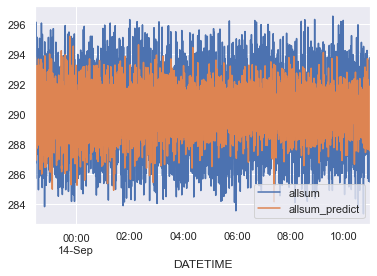

In [21]:
# All Sum Auto Regression
# Lags of 3600 was used because a period of 1hour is considered
AutoReg_model_Allsum = AutoReg(machine_data_train_allsum['allsum'], lags=3600)
AutoReg_model_Allsum_fit = AutoReg_model_Allsum.fit()

AutoReg_Allsum_yhat = AutoReg_model_Allsum_fit.predict(len(machine_data_train_allsum['allsum']), len(machine_data_train_allsum['allsum'])+len(machine_data_test_allsum['allsum'])-1)

AutoReg_Allsum_yhat = pd.DataFrame(AutoReg_Allsum_yhat, columns=['allsum_predict'])

AutoReg_machine_data_allsum = machine_data_test_allsum.copy()
AutoReg_machine_data_allsum['allsum_predict'] = AutoReg_Allsum_yhat['allsum_predict']

AutoReg_machine_data_allsum.plot()

mean_absolute_percentage_error(AutoReg_machine_data_allsum['allsum_predict'], AutoReg_machine_data_allsum['allsum'])

In [ ]:
# As observed that the MAPE is around 0.79% which is a good indication of forecast
# Distribution of the forecast is not saturated to a singular number which is also a 
# good indication that the forecast is not overfitted

C:\Users\ASHNER_NOVILLA\anaconda3\envs\datascience\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


2.7603532573371115

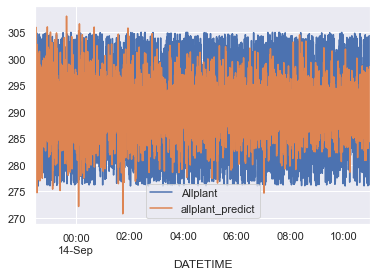

In [22]:
# All Plant Auto Regression
machine_data_train_allplant = machine_data_train.loc[:,machine_data_train.columns=='Allplant']
machine_data_test_allplant = machine_data_test.loc[:,machine_data_test.columns=='Allplant']

AutoReg_model_Allplant = AutoReg(machine_data_train_allplant['Allplant'], lags=3600)
AutoReg_model_Allplant_fit = AutoReg_model_Allplant.fit()

AutoReg_Allplant_yhat = AutoReg_model_Allplant_fit.predict(len(machine_data_train_allplant['Allplant']), len(machine_data_train_allplant['Allplant'])+len(machine_data_test_allplant['Allplant'])-1)

AutoReg_Allplant_yhat = pd.DataFrame(AutoReg_Allplant_yhat, columns=['allplant_predict'])

AutoReg_machine_data_allplant = machine_data_test_allplant.copy()
AutoReg_machine_data_allplant['allplant_predict'] = AutoReg_Allplant_yhat['allplant_predict']

AutoReg_machine_data_allplant.plot()

mean_absolute_percentage_error(AutoReg_machine_data_allplant['allplant_predict'], AutoReg_machine_data_allplant['Allplant'])

In [23]:
# As observed that the MAPE is around 2.76% which is a good indication of forecast
# Distribution of the forecast is not saturated to a singular number which is also a 
# good indication that the forecast is not overfitted

# Convert the data from unsupervised dataset to supervised dataset


In [24]:
# Setting the target to mean + 3sigma for upper limit for each attributes
# Setting the target to mean - 3sigma for lower limit for each attribites


In [25]:
# Parameters Limit
machine_data_mean = []
machine_data_std = []
attributes = []

for col in machine_data_grp.columns:
    mean = machine_data_test[col].mean()
    std = machine_data_test[col].std()
    machine_data_mean.append(mean)
    machine_data_std.append(std)
    attributes.append(col)

machine_data_limits = pd.DataFrame(attributes, columns = ['Attributes'])
machine_data_limits['UL'] = pd.DataFrame(machine_data_mean + machine_data_std)
machine_data_limits['LL'] = pd.DataFrame(np.array(machine_data_mean) - np.array(machine_data_std))

del(machine_data_mean)
del(machine_data_std)
del(attributes)

print(machine_data_limits.loc[0,'UL'])
print(machine_data_limits.iloc[0]['UL'])

2.2089599313222403
2.2089599313222403


In [26]:
print(machine_data_limits)
# Observed is the limits got from 
# Setting the target to mean + 3sigma for upper limit for each attributes
# Setting the target to mean - 3sigma for lower limit for each attribites

   Attributes          UL          LL
0       M1HP1    2.208960    2.168508
1       M2HP1    2.208300    2.168712
2       M3HP1    2.208230    2.168298
3       M4HP1    2.208008    2.167876
4       M5HP1    2.208045    2.167581
5       M6HP1    2.206960    2.166997
6       M7HP1    2.207354    2.166761
7       M8HP7   15.596182   15.300074
8      M9HP48  107.078272  105.086375
9      M10HP3    6.678820    6.558231
10     M11HP3    6.682185    6.560614
11     M12HP7   15.587140   15.293708
12    M13HP19   42.349458   41.562774
13        FWB   17.921264   17.593989
14         OC   59.792390   58.674396
15       BBCM    2.987405    2.932031
16     allsum  290.128974  287.612773
17   Allplant  290.691977  282.319047


In [27]:
#1 Fail
#0 Pass

# Applying semi supervised model after getting the limits

# We get the forecast data for the next 100 points
# If we need more prediction change the points_predict to the desired points to be predicted minus 1

In [28]:
points_predict = 99

In [29]:
AutoReg_Allsum_forecast = pd.DataFrame(AutoReg_model_Allsum_fit.predict(len(machine_data_train_allsum['allsum']), 
                                                           len(machine_data_train_allsum['allsum'])+len(machine_data_test_allsum['allsum'])+points_predict), columns=['AllSum_Forecasted'])
AutoReg_Allsum_forecast = AutoReg_Allsum_forecast.iloc[int(len(AutoReg_Allsum_yhat)):,:]


In [30]:
AutoReg_Allplant_forecast = pd.DataFrame(AutoReg_model_Allplant_fit.predict(len(machine_data_train_allplant['Allplant']), 
                                                               len(machine_data_train_allplant['Allplant'])+len(machine_data_test_allplant['Allplant'])+points_predict), columns=['Allplant_Forecasted'])
AutoReg_Allplant_forecast = AutoReg_Allplant_forecast.iloc[int(len(AutoReg_Allplant_yhat)):,:]


In [31]:
AutoReg_Allsum_forecast['result'] = np.where((AutoReg_Allsum_forecast > machine_data_limits.loc[16,'UL']) | (AutoReg_Allsum_forecast < machine_data_limits.loc[16,'LL']),1,0)

AutoReg_Allsum_forecast['AllSum_Forecasted'].describe()

count    100.000000
mean     290.093919
std        1.086701
min      287.391550
25%      289.256798
50%      290.177557
75%      290.839176
max      292.726959
Name: AllSum_Forecasted, dtype: float64

In [32]:
#Checking how many pass and how many fail
AutoReg_Allsum_forecast['result'].value_counts()

1    53
0    47
Name: result, dtype: int64

In [33]:
# So we can say that after forecasting of 100 points there is a chance that 53/100 will fail 
# and only 47/100 will pass when the limit is set to mean + 3sigma for upper limit for each attributes
# and to mean - 3sigma for lower limit for each attribites.

In [34]:
AutoReg_Allplant_forecast['result'] = np.where((AutoReg_Allplant_forecast > machine_data_limits.loc[17,'UL']) | (AutoReg_Allplant_forecast < machine_data_limits.loc[17,'LL']),1,0)

AutoReg_Allplant_forecast['Allplant_Forecasted'].describe()

count    100.000000
mean     290.389231
std        3.600285
min      281.143802
25%      288.173775
50%      290.829102
75%      292.660483
max      298.208948
Name: Allplant_Forecasted, dtype: float64

In [35]:
#Checking how many pass and how many fail
AutoReg_Allplant_forecast['result'].value_counts()

1    54
0    46
Name: result, dtype: int64

In [36]:
# So we can say that after forecasting of 100 points there is a chance that 54/100 will fail 
# and only 46/100 will pass when the limit is set to mean + 3sigma for upper limit for each attributes
# and to mean - 3sigma for lower limit for each attribites